In [1]:
!pip install tensorflow
!pip install opencv-python

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/0f/a5/89a9bdae9f241cad167edb6c890ef2b4c842c5ae81058a2fbfd702dba9bf/tensorflow-2.17.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38

In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [39]:
IMG_SIZE = 28

In [6]:
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

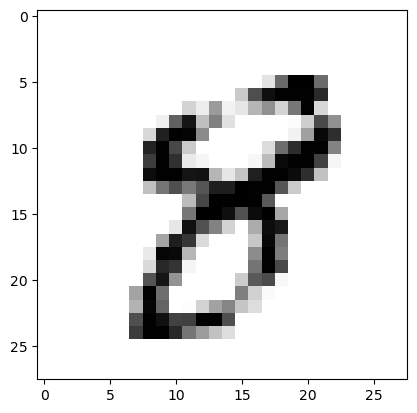

In [28]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)], cmap = plt.cm.binary)
plt.show()

In [30]:
x_train[random.randint(0,len(x_train)-1)]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,  88, 214, 135,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  36, 253, 253, 181,   0,   0,   0,   0,   0,
          0,   0],
       [  

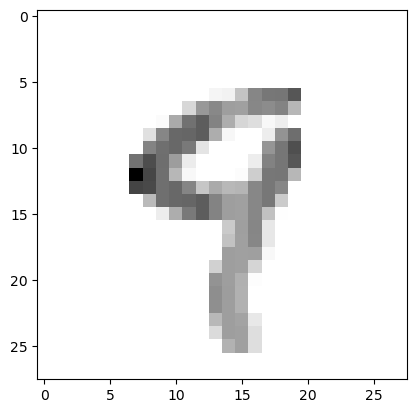

In [34]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[random.randint(0,len(x_train)-1)], cmap=plt.cm.binary)

5

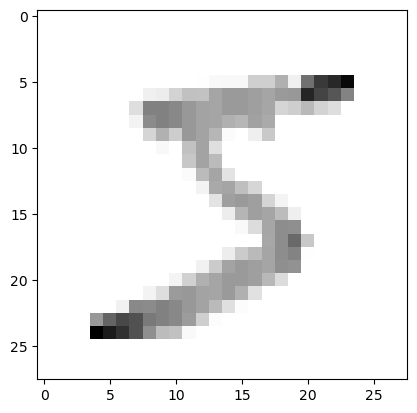

In [38]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
y_train[0]

In [46]:
x_train_res = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test_res = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x_train_res.shape, x_test_res.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [56]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = x_train_res.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [57]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [58]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [59]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

In [60]:
model.add(Dense(32))
model.add(Activation('relu'))

In [61]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [66]:
model.fit(x_train_res, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7737 - loss: 0.6965 - val_accuracy: 0.9463 - val_loss: 0.1741
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9647 - loss: 0.1189 - val_accuracy: 0.9688 - val_loss: 0.1004
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9752 - loss: 0.0803 - val_accuracy: 0.9596 - val_loss: 0.1345
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9820 - loss: 0.0603 - val_accuracy: 0.9764 - val_loss: 0.0788
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9839 - loss: 0.0514 - val_accuracy: 0.9701 - val_loss: 0.0998


In [67]:
test_loss, test_acc = model.evaluate(x_test_res, y_test)
print(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.0992
0.09013119339942932 0.9717000126838684


In [69]:
predictions = model.predict([x_test_res])
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.11155076e-07, 6.08877735e-06, 4.89899030e-05, ...,
        9.99767780e-01, 3.47621904e-06, 1.16562755e-04],
       [2.37962940e-05, 1.21040812e-05, 9.99471962e-01, ...,
        2.90148251e-04, 1.36667568e-05, 1.45384718e-06],
       [1.24568828e-07, 9.99449372e-01, 1.14497948e-06, ...,
        5.43389353e-04, 1.12702551e-07, 3.25201967e-07],
       ...,
       [2.93938346e-10, 4.96517216e-10, 5.49472551e-11, ...,
        5.95387610e-05, 1.18466472e-08, 3.55038469e-06],
       [2.04705102e-05, 3.21454110e-07, 1.14079057e-07, ...,
        9.23338348e-08, 3.51917806e-05, 6.17925116e-06],
       [4.30869521e-04, 6.60103206e-06, 2.81449902e-04, ...,
        3.03712181e-06, 6.74780458e-05, 1.50389591e-04]], dtype=float32)

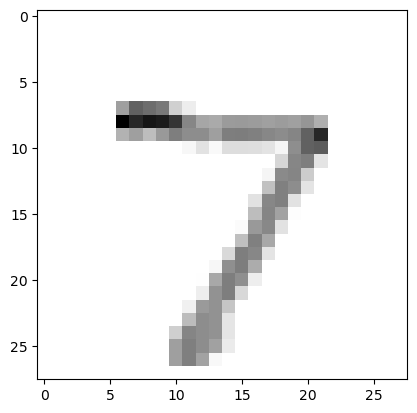

7

In [73]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
np.argmax(predictions[0])

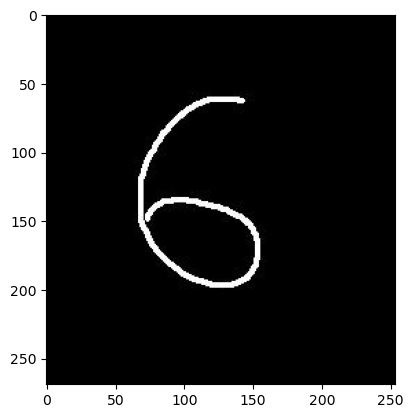

In [93]:
custom_img = cv2.imread('custom_img.png')
plt.imshow(custom_img)
plt.show()

In [94]:
custom_img.shape

(269, 254, 3)

In [95]:
gray = cv2.cvtColor(custom_img, cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
resize.shape

(28, 28)

In [96]:
custom_img = tf.keras.utils.normalize(resize, axis=1)
custom_img = np.array(custom_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
custom_predictions = model.predict(custom_img)
np.argmax(custom_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


6